In [12]:
# %matplotlib inline
import pandas as pd
import sklearn
import numpy as np
from IPython.display import display
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [24]:
plt.rcParams['font.family']='TH SarabunPSK' #you can change to other font that works for you
plt.rcParams.update({'font.size': 50})

In [14]:
import seaborn as sns
sns.set(style="darkgrid")

In [15]:
input_ch3 = pd.read_csv('data_ch3_bigfile_no_content.csv')

In [5]:
input_ch3.head()

,headline,date,DOW,time,view,category,tag
0,"เจ้าหน้าที่ยังตามหา""น้องภาคิน""หายตัวจากบ้าน",05/04/2562,FRI,19:01,143,ในประเทศ,"น้องภาคิน,เด็กหาย,เพชรบุรี"
1,"""รัชนก""พ่าย""ไท่ ซื่อ หยิง""มือ 1 โลก ร่วงตกรอบ ...",05/04/2562,FRI,18:50,108,กีฬา,"ไท่ ซื่อ หยิง,มาเลเซีย โอเพ่น,แบดมินตัน,รัชนก ..."
2,“สราวุฒิ” สุดเจ๋งผงาดคว้าแชมป์สเตจ 5 จักรยานทา...,05/04/2562,FRI,18:38,205,กีฬา,"ทัวร์ ออฟ ไทยแลนด์,สราวุฒิ สิริรณชัย,จักรยานทา..."
3,"""แบงค์ ฮอร์โมน""ขอผ่อนผันการเกณฑ์ทหาร",05/04/2562,FRI,18:25,73,บันเทิง,"แบงค์ ฮอร์โมน,ผ่อนผันทหาร"
4,สนามฟุตบอลจากขยะรีไซเคิล ช่วงบอลโลก 2018,05/04/2562,FRI,18:06,18,กีฬา,"ฟุตบอลโลก 2018,สนามฟุตบอล,สนามฟุตบอลจากวัสดุรี..."


In [6]:
print("number of news : ", len(input_ch3))
print("number of category : ", len(input_ch3.category.unique()))
print("max view : ", input_ch3.view.max())
print("min view : ", input_ch3.view.min())
# print("number of news : ", len(input_ch3))

number of news :  24717
number of category :  11
max view :  233230
min view :  5


In [7]:
input_ch3.sort_values(by=['view'], ascending=False)[:20]

,headline,date,DOW,time,view,category,tag
1124,รถขนบัตรเลือกตั้งสัญญาณ GPS หาย,22/03/2562,FRI,11:56,233230,ในประเทศ,"รถขนหีบบัตรเลือกตั้ง,เลือกตั้ง62,ไปรษณีย์ไทย,ก..."
379,ผลสลากกินแบ่งรัฐบาล 1 เม.ย.62,01/04/2562,MON,16:00,196995,ในประเทศ,"สลากกินแบ่งรัฐบาล,หวย"
11790,"สลายสีเสื้อเหลือง-แดง""สนธิ""จับมือ""จตุพร""ตั้งพร...",09/10/2561,TUE,11:19,166921,การเมือง,"สลายสีเสื้อเหลือง-แดง ""สนธิ"" จับมือ ""จตุพร"" ตั..."
3318,ข่าวดีคนกรุง!เปิดเดินรถไฟฟ้าใต้ดิน หัวลำโพง-หล...,21/02/2562,THU,16:05,151413,เศรษฐกิจ,"รถไฟฟ้าใต้ดิน,รถไฟสายสีน้ำเงิน,ส่วนต่อขยายหัวล..."
1980,ม.3 เครียด ติด ร.หลายตัว ฆ่าตัวตาย,11/03/2562,MON,17:41,141738,ในประเทศ,"ม.3เครียด ติด ร.,นร.ฆ่าตัวตาย,ติด ร. เครียด ฆ่..."
2671,บรรยากาศงานบอล ฉลองครบรอบ 49 ปี ไทยทีวีสีช่อง ...,02/03/2562,SAT,12:28,116182,บันเทิง,"49ปีช่อง3,ครบรอบ49ปี,ช่อง 3,งานวัดคาร์นิว้าว"
1589,ผลสลากกินแบ่งรัฐบาล 16 มี.ค.62,16/03/2562,SAT,16:04,112956,ในประเทศ,"สลากกินแบ่งรัฐบาล,รางวัล"
3023,เสี่ยโป้ นำทีมน้องฝั่งธนฯกว่า 100 คน บุก สน.บา...,26/02/2562,TUE,09:51,81806,ในประเทศ,"โจ๋งานบวช,วัยรุ่นงานบวช,งานบวชวัดสิงห์,เสี่ยโป้"
365,ชาวเน็ตแชร์รางวัลลอตเตอรี่งวดนี้มาจากคะแนนเลือ...,02/04/2562,TUE,08:23,78753,ในประเทศ,"ล็อตเตอรี่,รางวัลที่ 1,คะแนนเลือกตั้ง,เลือกตั้ง62"
6121,ด่วน!จับแล้วเขยโหด ฆ่ายกครัว 5 ศพ,15/01/2562,TUE,11:39,76331,ในประเทศ,"เขยโหดฆ่ายกครัว,ฆ่ายกครัว5ศพ"


In [8]:
input_ch3.sort_values(by=['view'], ascending=True)[:20]

,headline,date,DOW,time,view,category,tag
316,กิเลนผยองดัน'โค้ชทัย'คุมทีมชั่วคราวแทน'โค้ชเบ๊...,02/04/2562,TUE,12:09,5,กีฬา,"เมืองทอง ยูไนเต็ด,อุทัย บุญเหมาะ,โค้ชเบ๊,กิเลน..."
21,คลังอาเซียนจับมือฝ่ามรสุมเศรษฐกิจชะลอตัว,05/04/2562,FRI,15:27,5,เศรษฐกิจ,"คลังอาเซียน,เศรษฐกิจชะลอตัว"
8559,'มิลิค'ฮีโร่ยิงประตูชัยพา นาโปลี เฉือน อตาลันต...,04/12/2561,TUE,11:04,8,กีฬา,"กัลโช่ เซเรีย อา,นาโปลี,อตาลันต้า,ผลบอล"
141,กรมชลประทานยืนยันแผนจัดการน้ำแล้งเพียงพอ,04/04/2562,THU,11:17,9,เศรษฐกิจ,"กรมชลประทาน,จัดการน้ำ,เกษตรกร,หน้าแล้ง,ฤดูฝน"
9009,โอบาซัดชัย ปืนใหญ่เบียดบอร์นมัธ 2-1 จี้บิ๊กโฟร...,26/11/2561,MON,10:11,13,กีฬา,"ผลฟุตบอล,พรีเมียร์ลีก"
1521,ค่ายเพลงห้องเล็ก รวมศิลปินขวัญใจเด็กแนว จัดคอน...,18/03/2562,MON,09:34,13,บันเทิง,"คอนเสิร์ต,เร็กเก้"
72,เปิดตัวสมรภูมิไอเดีย ซีซั่นใหม่ในโจทย์ Challen...,05/04/2562,FRI,10:43,13,บันเทิง,"สิ่งประดิษฐ์,สมรภูมิไอเดีย 2019"
26,ลุ้นหมอกควันวันสงกรานต์ที่เชียงใหม่,05/04/2562,FRI,15:23,14,ในประเทศ,"หมอกควัน,สงกรานต์"
9629,แมนฯ ซิตี้ยืนยัน'เมนดี้'ผ่าเข่าซ้าย ยังไม่รู้ก...,15/11/2561,THU,10:11,15,กีฬา,"แมนเชสเตอร์ ซิตี้,พรีเมียร์ลีก"
317,'พิคฟอร์ด'โกลทีมชาติอังกฤษของขึ้น ทะเลาะขี้เมา...,02/04/2562,TUE,12:07,15,กีฬา,"จอร์แดน พิคฟอร์ด,ผู้รักษาประตูทีมชาติอังกฤษ,เอ..."


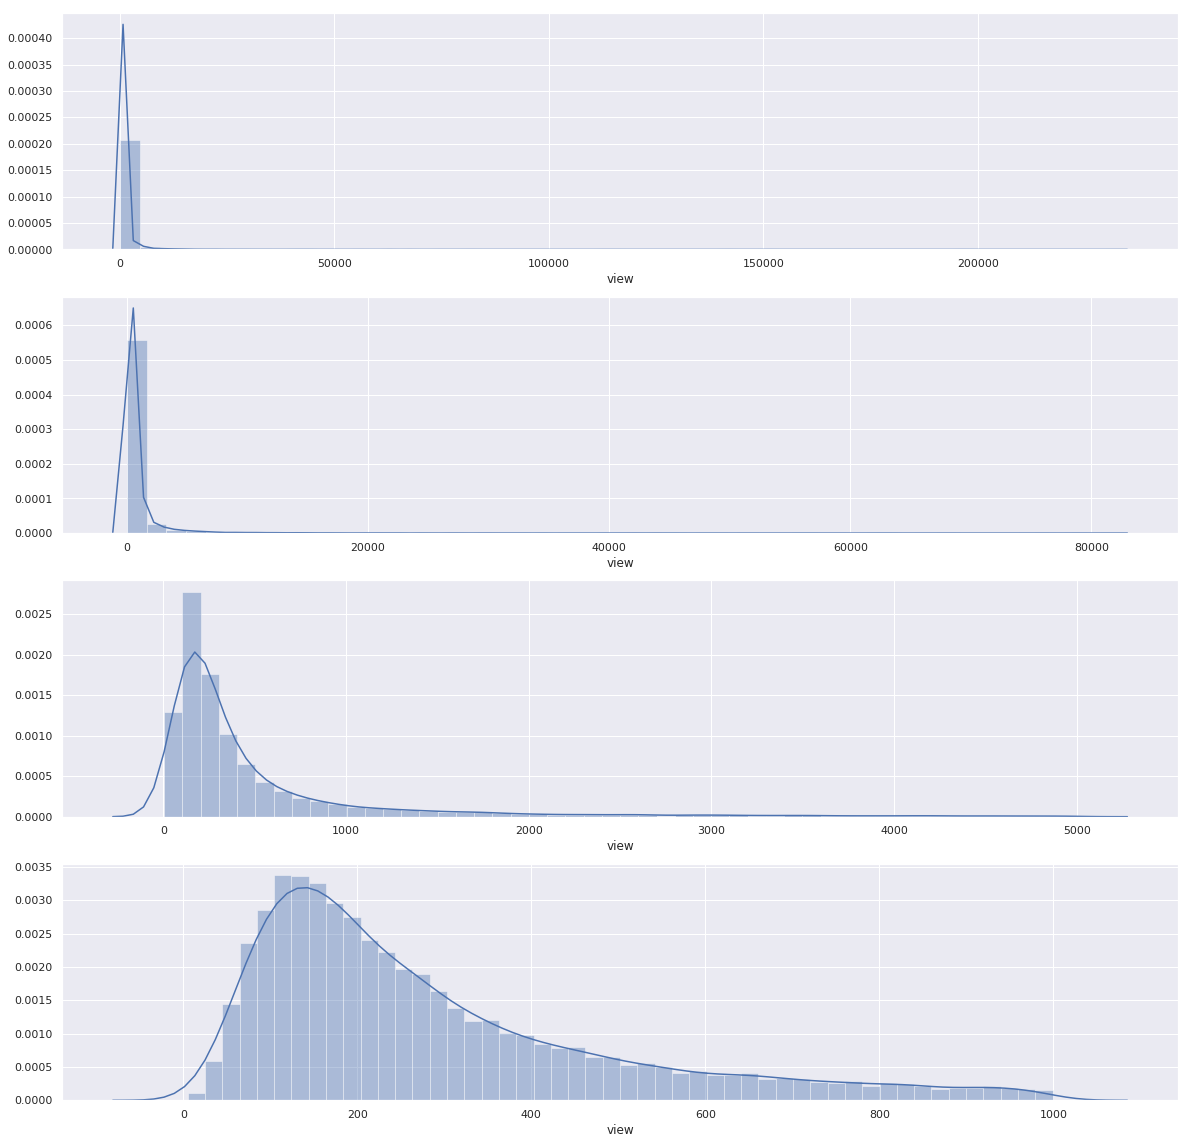

In [11]:
f, axarr = plt.subplots(4, figsize=(20,20))
sns.distplot(input_ch3['view'],ax=axarr[0])
sns.distplot(input_ch3[input_ch3['view']<100000]['view'],ax=axarr[1])
sns.distplot(input_ch3[input_ch3['view']<5000]['view'],ax=axarr[2])
sns.distplot(input_ch3[input_ch3['view']<1000]['view'],ax=axarr[3])

In [16]:
input_ch3['hour'] = input_ch3['time'].str.split(':', expand = True)[0]

In [17]:
input_ch3['numTag'] = input_ch3['tag'].apply( lambda x : len(str(x).split(',')))

In [18]:
IQRval = input_ch3['view'].describe().loc['75%']-input_ch3['view'].describe().loc['25%']

In [19]:
outlierMin = max(input_ch3['view'].describe().loc['25%']-1.5*IQRval,0)
outlierMax = input_ch3['view'].describe().loc['75%']+1.5*IQRval
print(outlierMin,outlierMax)

0 1157.0


In [20]:
input_ch3_cut = input_ch3[(input_ch3['view']<=outlierMax) & (input_ch3['view']>=outlierMin)]

## Plot graph to see their relations

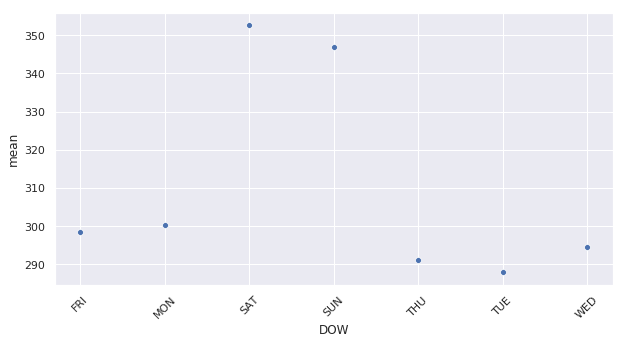

In [21]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=45)
sns.scatterplot(x="DOW", y="mean", data=pd.DataFrame(input_ch3_cut.groupby(['DOW'])['view'].describe()).reset_index())

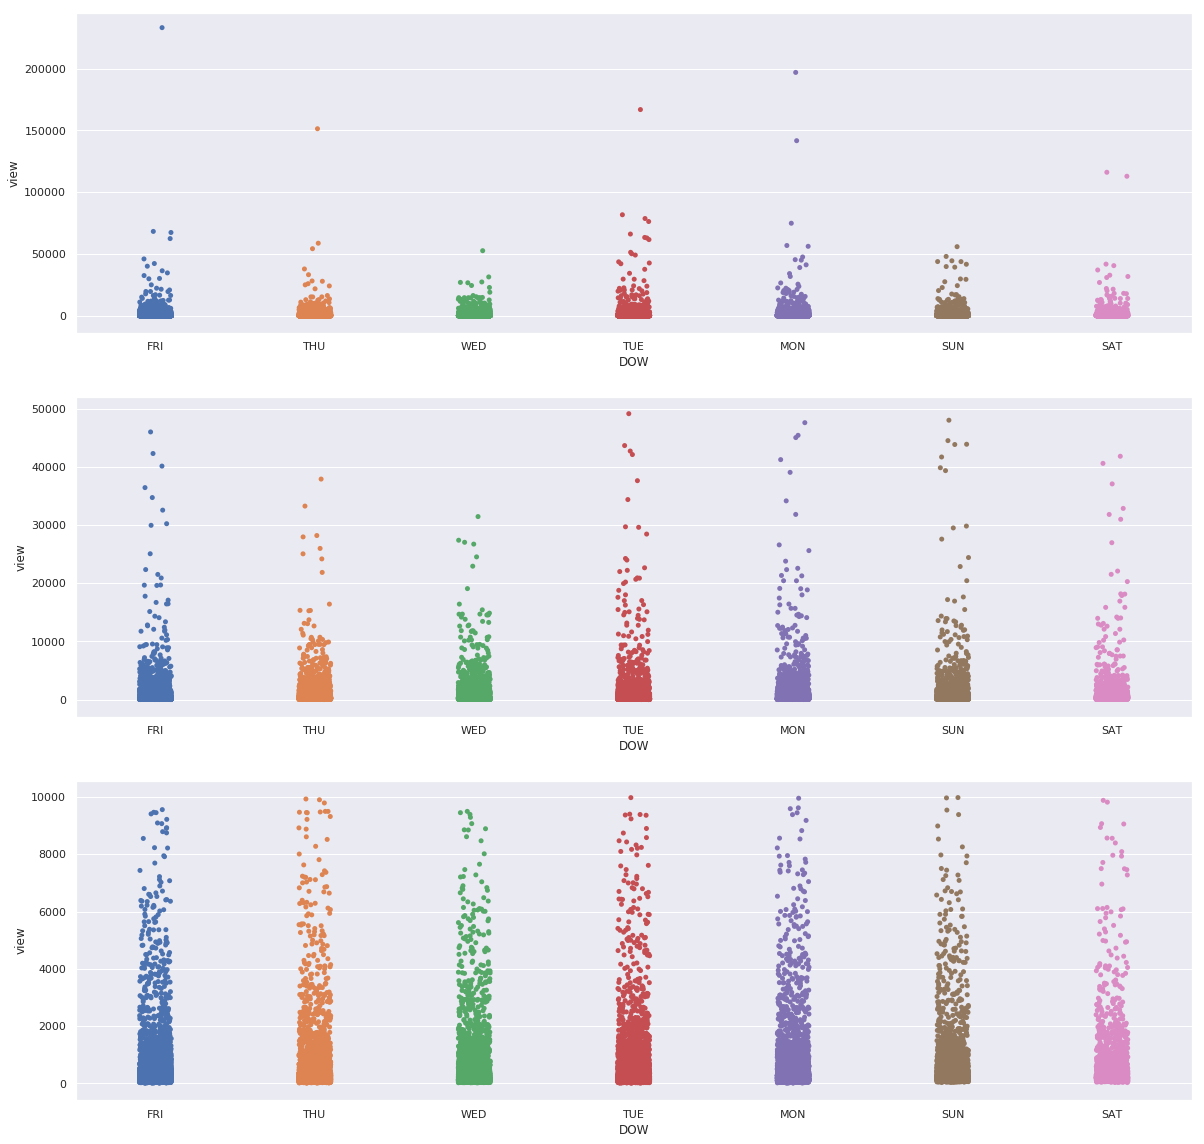

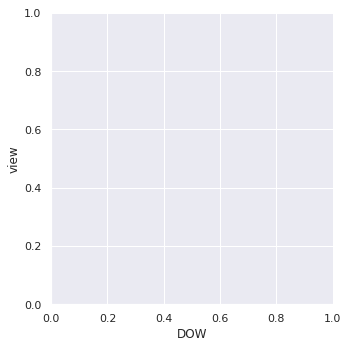

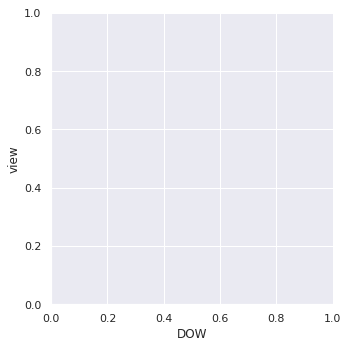

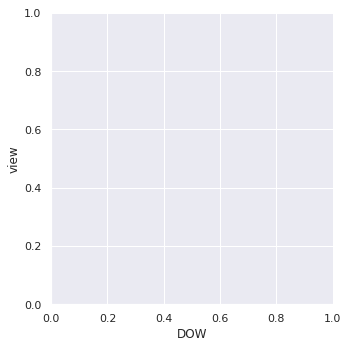

In [15]:
# plt.figure(figsize=(40,20))
fig , ax = plt.subplots(3,figsize=(20,20))
sns.catplot( ax=ax[0], x="DOW", y="view", data=input_ch3 )
sns.catplot( ax=ax[1], x="DOW", y="view", data=input_ch3[input_ch3['view']<50000])
sns.catplot( ax=ax[2], x="DOW", y="view", data=input_ch3[input_ch3['view']<10000])

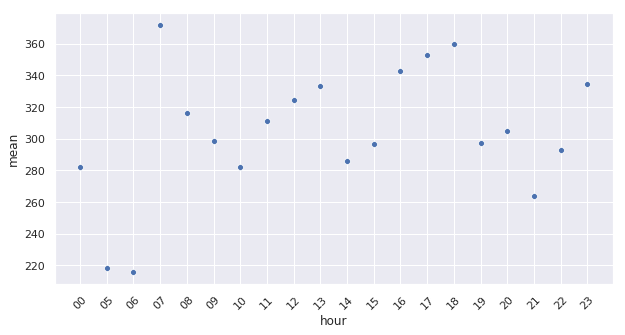

In [22]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=45)
sns.scatterplot(x="hour", y="mean", data=pd.DataFrame(input_ch3_cut.groupby(['hour'])['view'].describe()).reset_index())

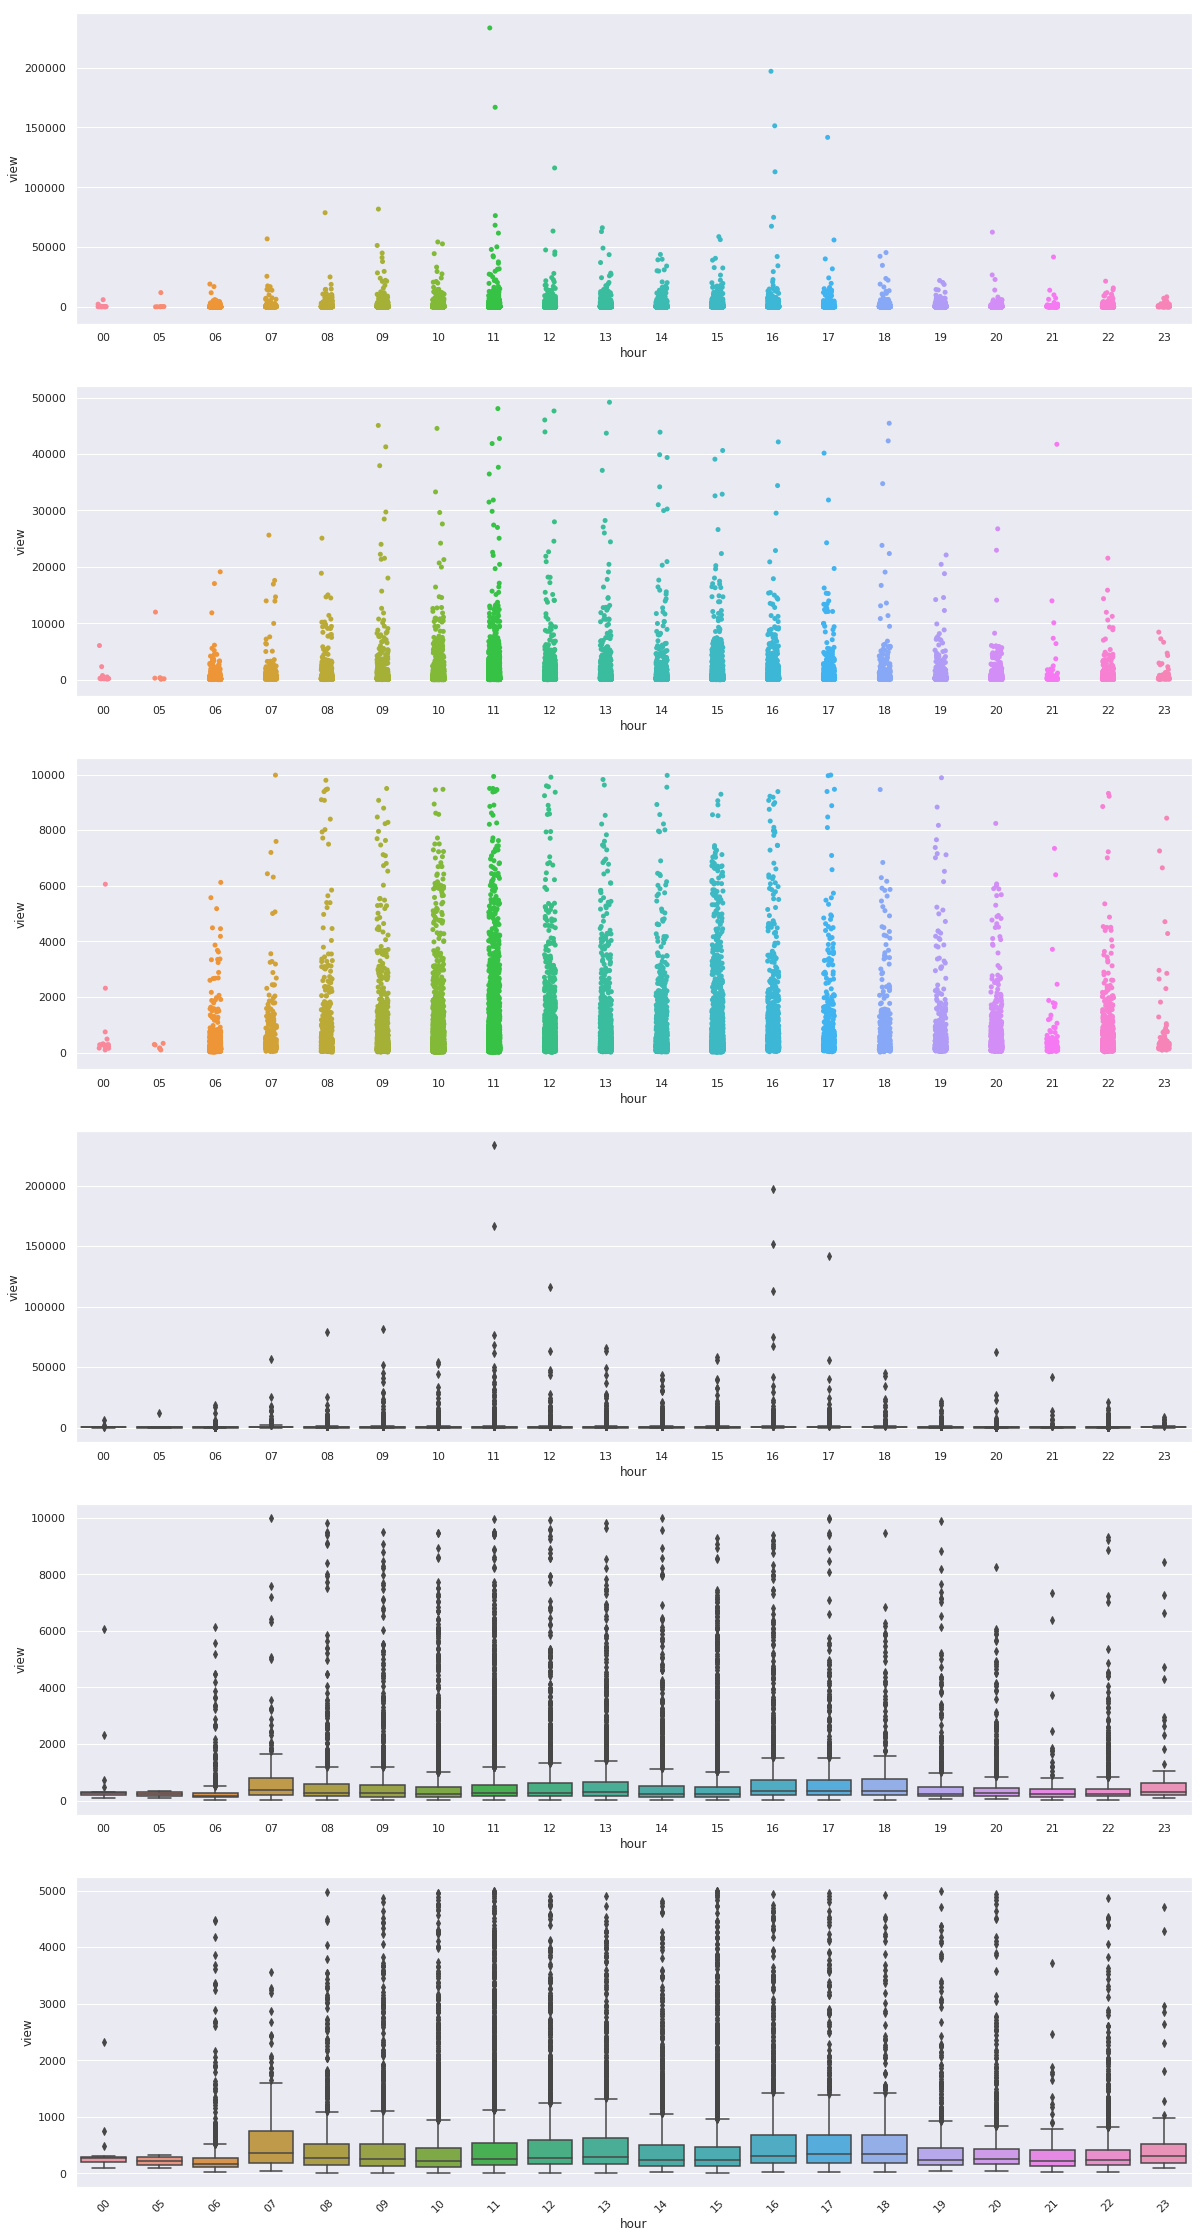

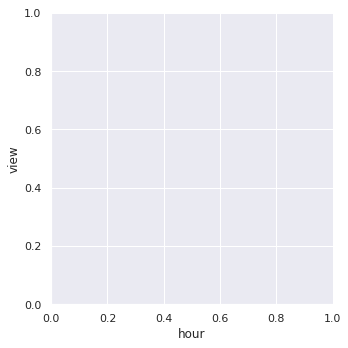

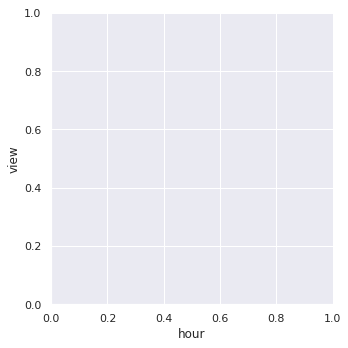

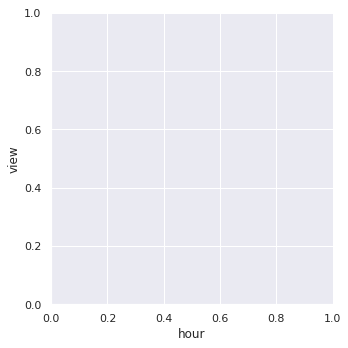

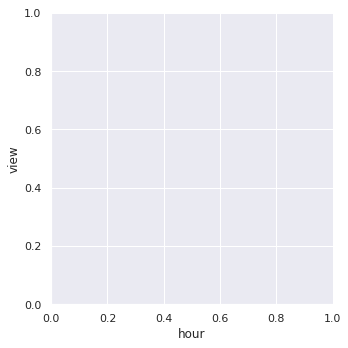

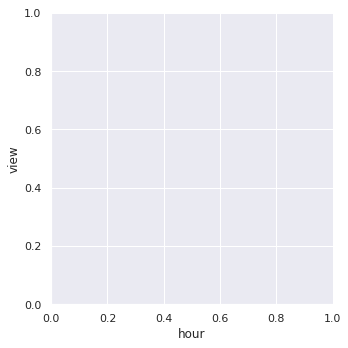

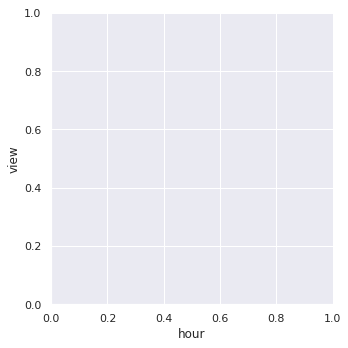

In [21]:
# plt.figure(figsize=(40,20))
fig , ax = plt.subplots(6,1,figsize=(20,40))
plt.xticks(rotation=45)
# sns.catplot( ax =ax[0],x="hour", y="view", data=input_ch3 )
sns.catplot( ax=ax[0], x="hour", y="view", data=input_ch3)
sns.catplot( ax=ax[1], x="hour", y="view", data=input_ch3[input_ch3['view']<50000])
sns.catplot( ax=ax[2], x="hour", y="view", data=input_ch3[input_ch3['view']<10000])
sns.catplot( ax=ax[3], x="hour", y="view",kind="box", data=input_ch3)
sns.catplot( ax=ax[4], x="hour", y="view",kind="box", data=input_ch3[input_ch3['view']<10000])
sns.catplot( ax=ax[5], x="hour", y="view",kind="box", data=input_ch3[input_ch3['view']<5000])

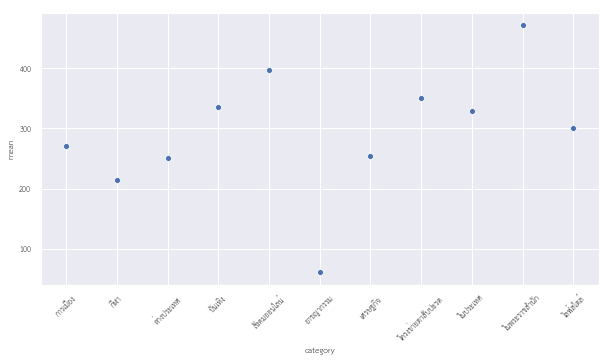

In [25]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=45)
sns.scatterplot(x="category", y="mean", data=pd.DataFrame(input_ch3_cut.groupby(['category'])['view'].describe()).reset_index())

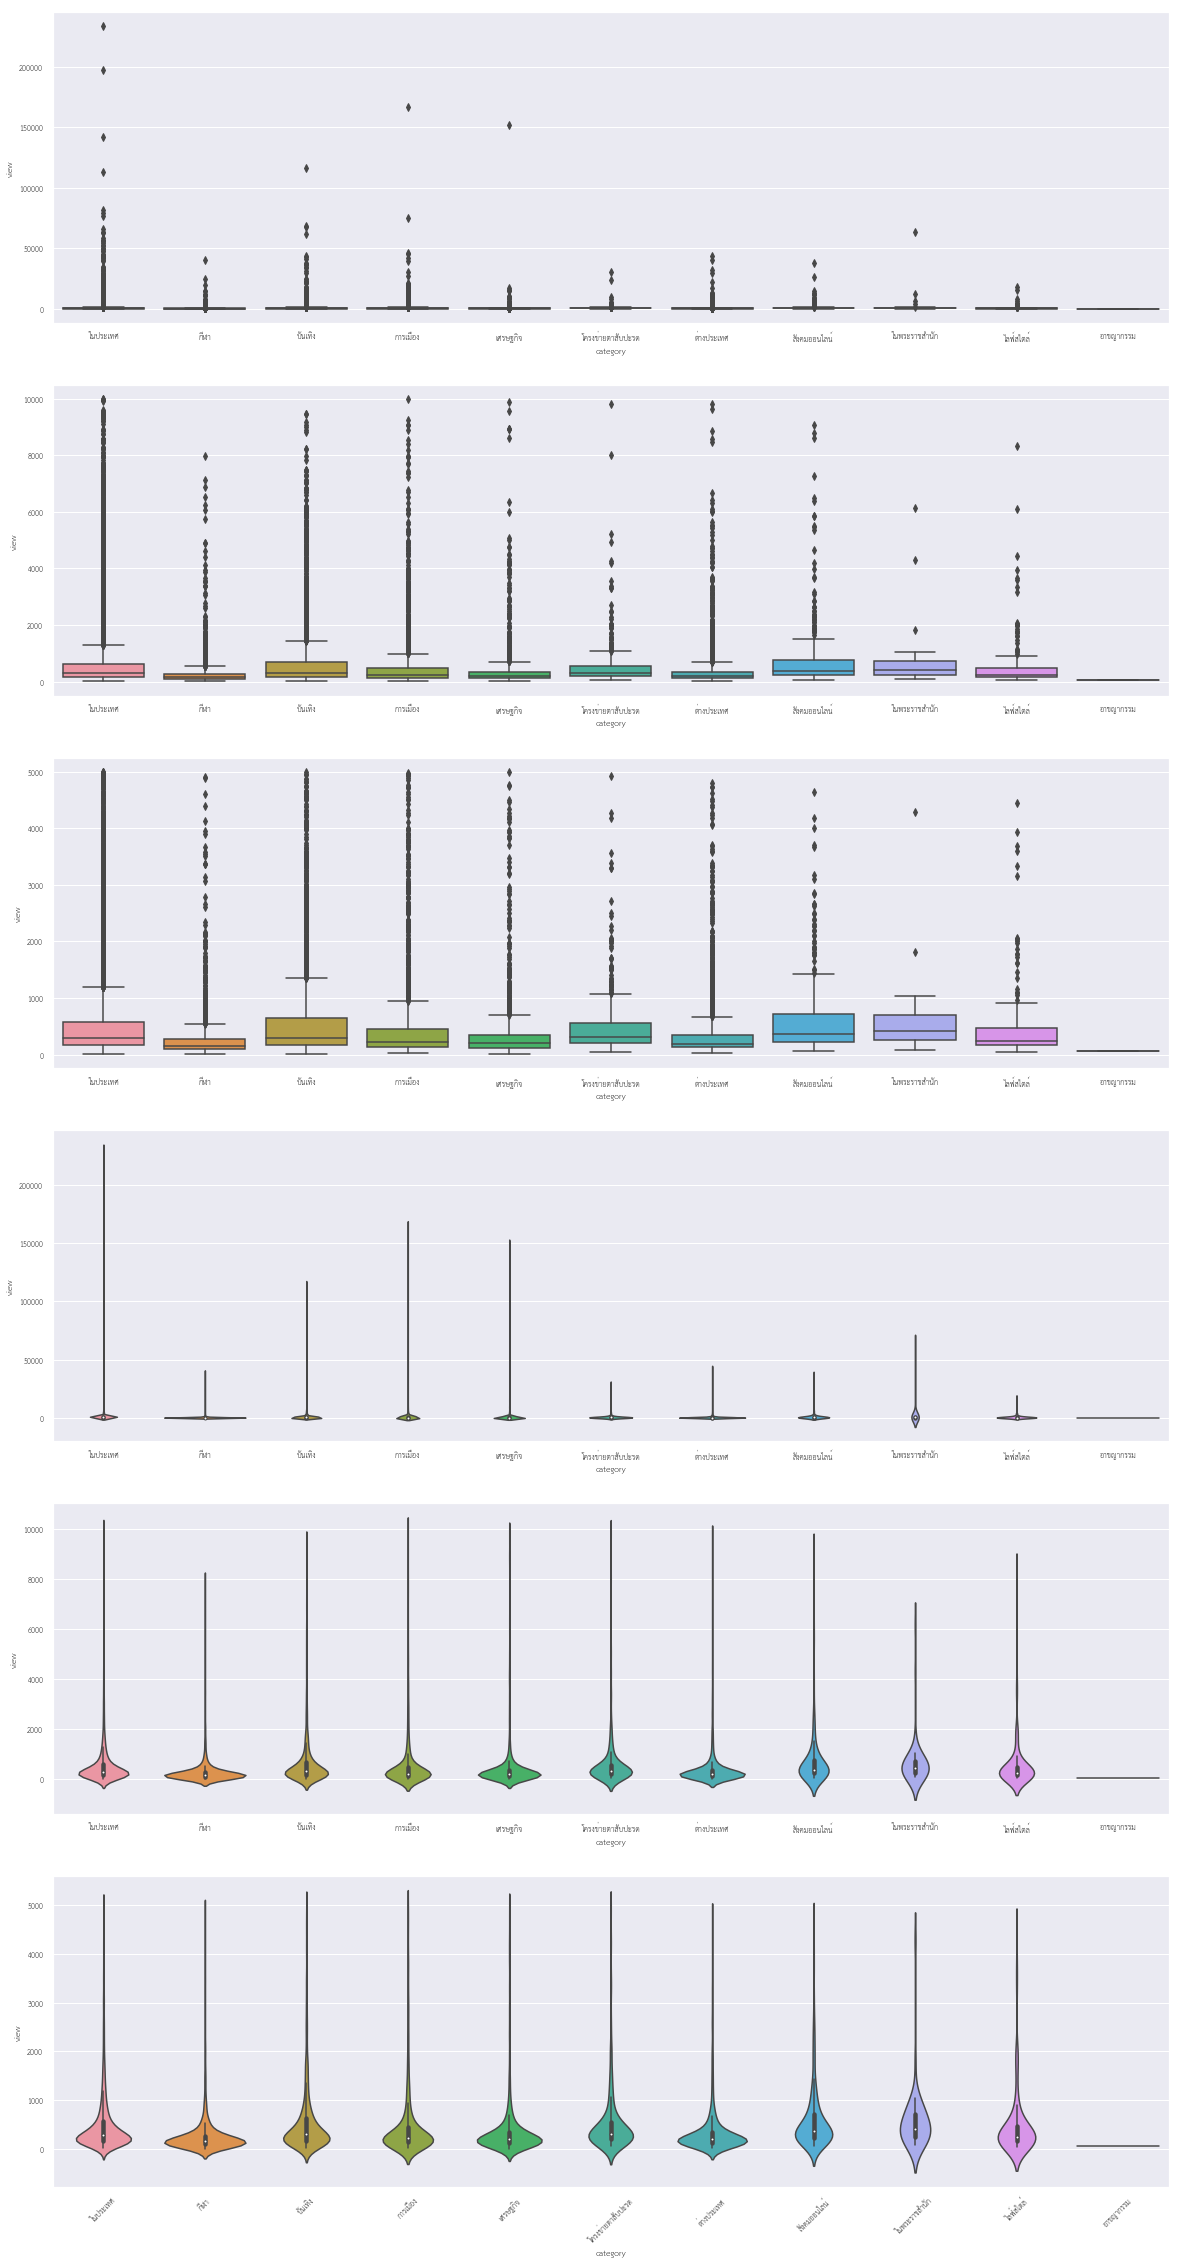

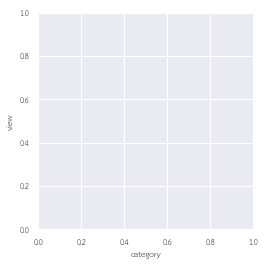

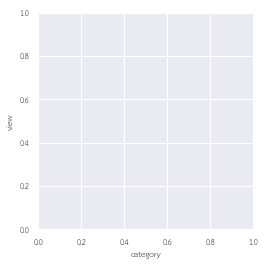

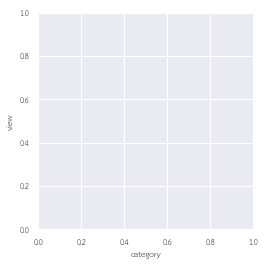

In [25]:
# plt.figure(figsize=(40,20))
fig , ax = plt.subplots(6,1,figsize=(20,40))
plt.xticks(rotation=45)
# sns.catplot( ax =ax[0],x="hour", y="view", data=input_ch3 )
sns.catplot( ax=ax[0], x="category", y="view",kind="box", data=input_ch3)
sns.catplot( ax=ax[1], x="category", y="view",kind="box",data=input_ch3[input_ch3['view']<10000])
sns.catplot( ax=ax[2], x="category", y="view", kind="box",data=input_ch3[input_ch3['view']<5000])
sns.violinplot( ax=ax[3], x="category", y="view", data=input_ch3)
sns.violinplot( ax=ax[4], x="category", y="view",data=input_ch3[input_ch3['view']<10000])
sns.violinplot( ax=ax[5], x="category", y="view",data=input_ch3[input_ch3['view']<5000])

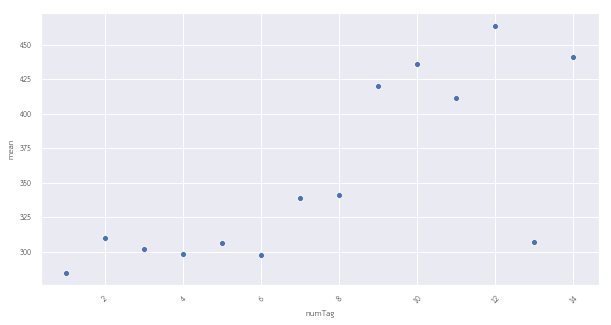

In [26]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=45)
sns.scatterplot(x="numTag", y="mean", data=pd.DataFrame(input_ch3_cut.groupby(['numTag'])['view'].describe()).reset_index())

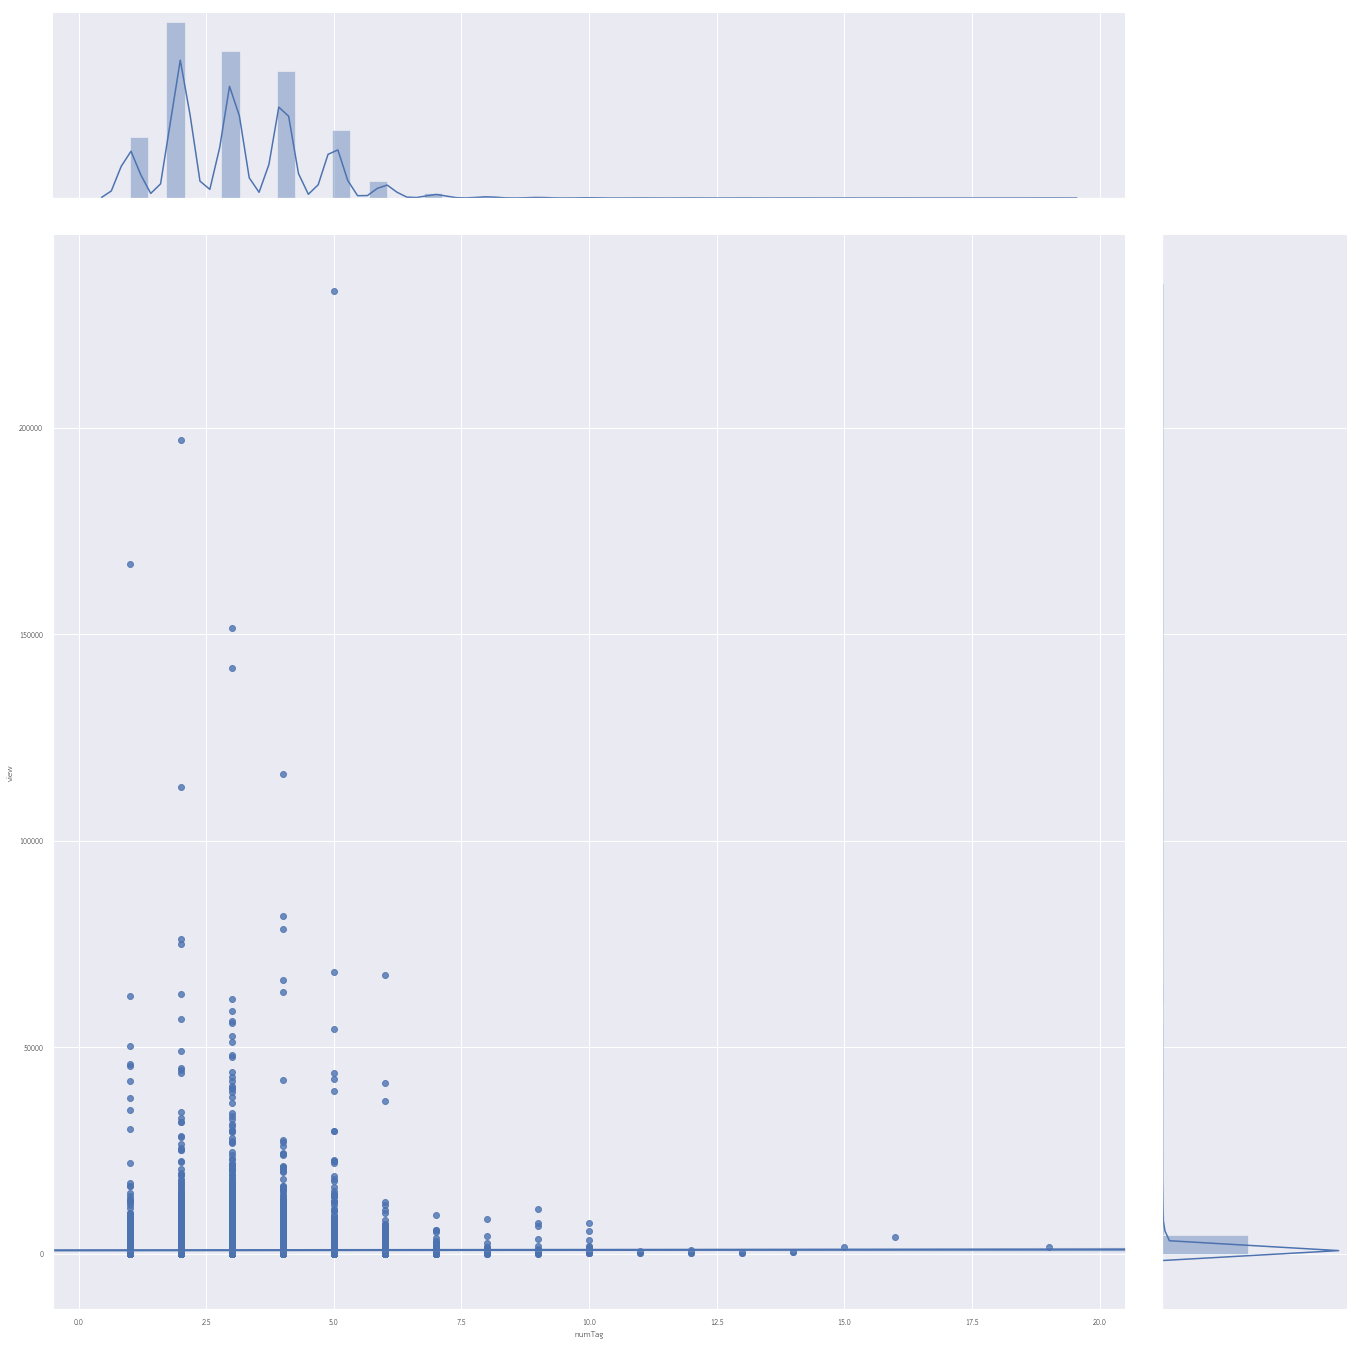

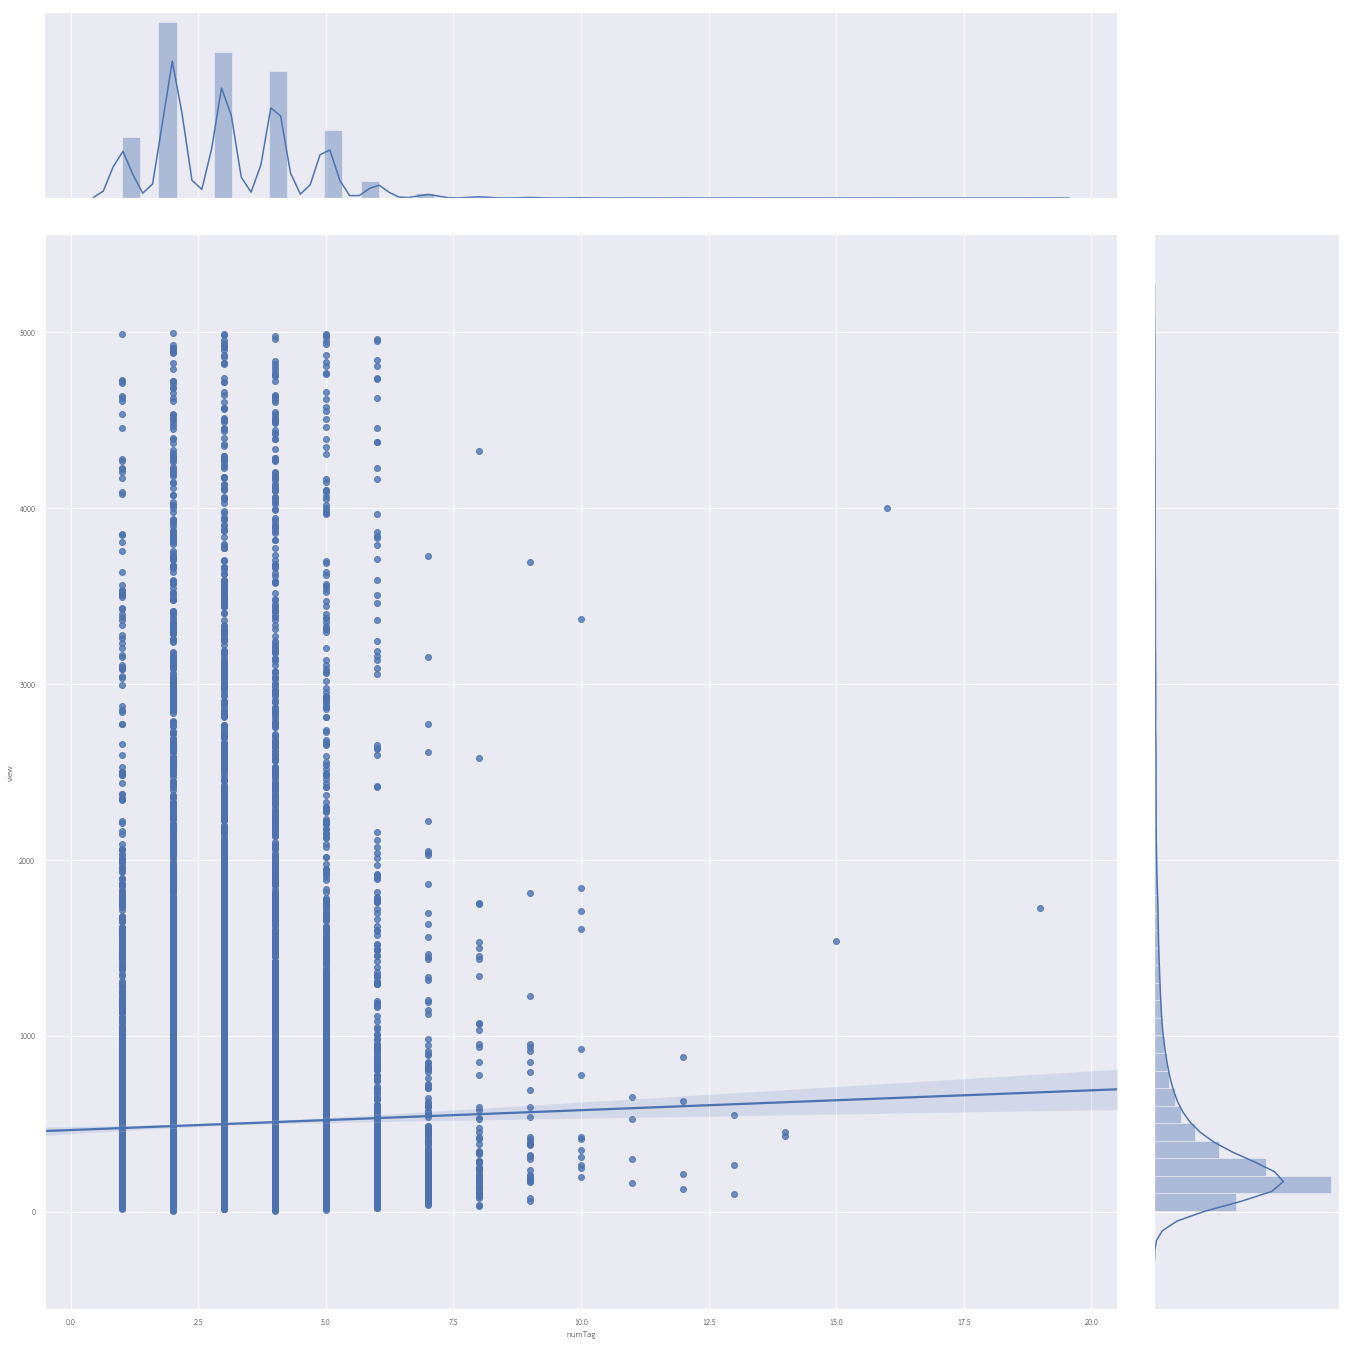

In [29]:
sns.jointplot("numTag", "view", data=input_ch3, kind="reg",height=20 )
sns.jointplot("numTag", "view", data=input_ch3[input_ch3['view']<5000], kind="reg",height=20 )

In [44]:
input_ch3.to_csv('notebook1-result-ch3.csv')